In [1]:
from qiskit import __version__

print(__version__)

1.3.2


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

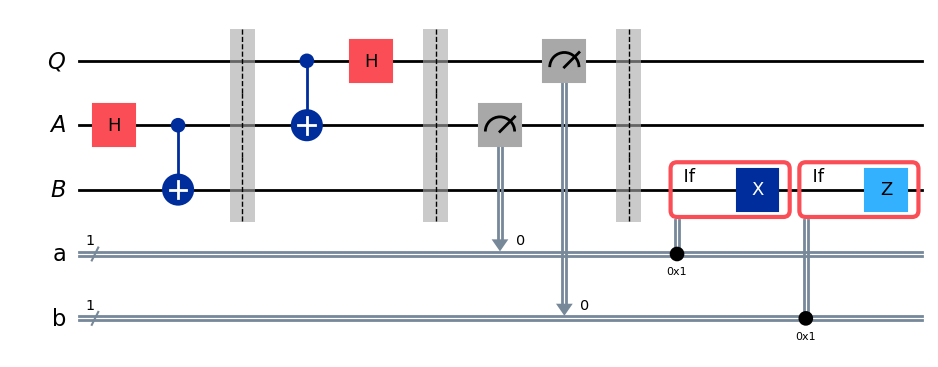

In [13]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

#Alice's operation
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

#Alice measures and send classical inforation to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

#Bob uses classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("mpl"))

In [18]:
random_gate = UGate(
        theta = random.random() * 2 * pi,
        phi = random.random() * 2 * pi,
        lam = random.random() * 2 * pi
)

display(array_to_latex(random_gate.to_matrix()))

<IPython.core.display.Latex object>

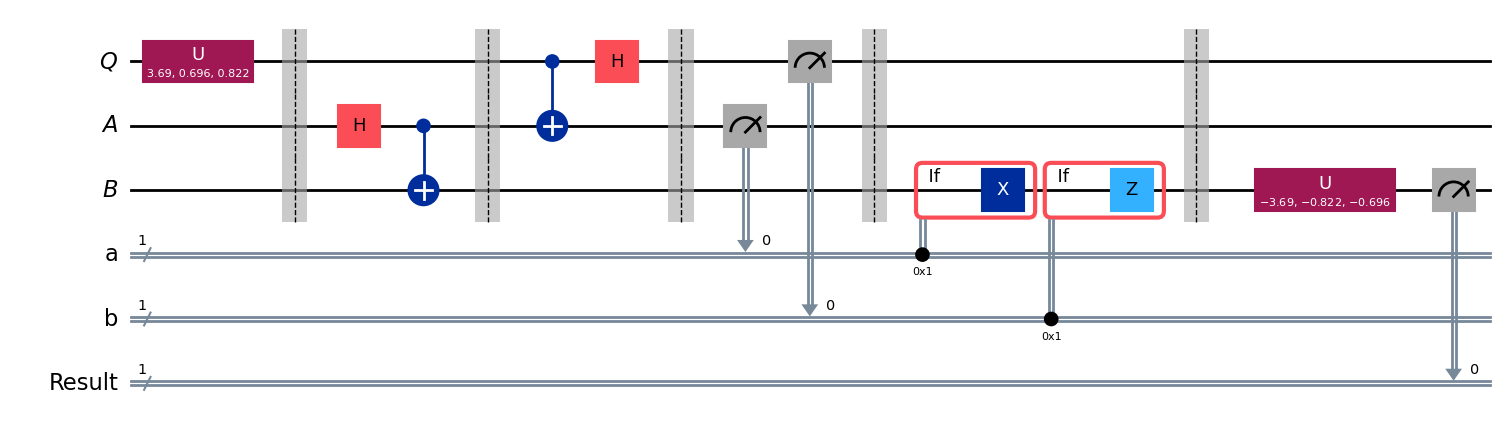

In [26]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q
test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.
test = test.compose(protocol)
test.barrier()

#Append inverse of the unitary gate to B and measure
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw("mpl"))

{'0 0 1': 281, '0 1 1': 243, '0 0 0': 244, '0 1 0': 256}


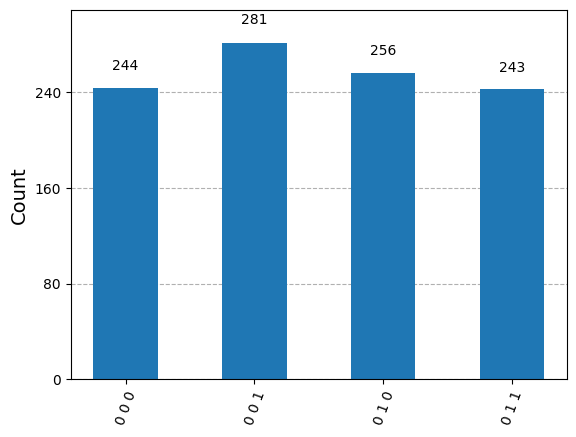

In [28]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
print(statistics)
display(plot_histogram(statistics))


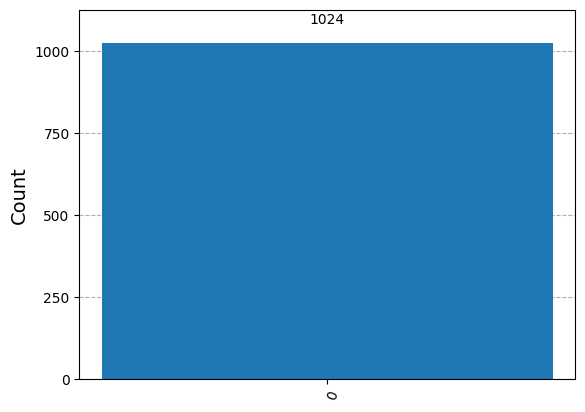

In [ ]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))
print(filtered_statistics)